In [55]:
# !pip install fasttext_win
# !pip install sentencepiece
#Importing libraries

import re,string
import numpy as np
import pandas as pd 
# import fasttext
import spacy


import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer, pos_tag, word_tokenize


stop_words=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = WordNetLemmatizer()

from gensim.models import word2vec
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from gensim.test.utils import datapath

import tensorflow as tf
from tensorflow.keras import backend

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Embedding, Reshape,Concatenate
from keras.models import Sequential
from keras.preprocessing.sequence import skipgrams, make_sampling_table
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm

In [7]:
sample_data=pd.read_excel('./data/recent_5k.xlsx')
sample_abs_data=sample_data['Abstract']
sample_abs_data



0       contamination of meat with antimicrobial-resis...
1       g-protein-coupled receptor 40 (gpr40) is consi...
2       the structures of melatonin and ferulic acid w...
3       there are currently no food and drug administr...
4       productivity of traditional backyard poultry i...
                              ...                        
4995    nutritional risk screening (nrs) is not yet es...
4996    purpose: a growing number of studies indicate ...
4997    non-alcoholic-fatty liver disease (nafld) is s...
4998    we propose and test a model of food policy acc...
4999    this study aimed to analyze the physicochemica...
Name: Abstract, Length: 5000, dtype: object

In [8]:
def text_cleaning(text):
    cleaned_txt = re.sub('<[^<]+>', ' ', str(text))
    cleaned_txt = re.sub( r'\[.*?\]', ' ',cleaned_txt)  #remove brackets
    cleaned_txt = re.sub('\d+', ' ', cleaned_txt)
    cleaned_txt = re.sub('\(\w+\)', ' ', cleaned_txt)
#     cleaned_txt=text.translate(str.maketrans(' ', ' ',string.punctuation)) 
    return cleaned_txt
   
def stopword_removal(text):
    cleaned_txt = ' '.join([token for token in word_tokenize(text) if token not in stop_words])
    return cleaned_txt
def lemmatize_text(text):
    cleaned_txt=' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(text)])

    return cleaned_txt

def preprocessed_text(df):
    
    col=['nltk_tokens','nouns_verbs','lemmatize_text']
    preprocess_txt=pd.DataFrame(columns=col)
    abs_clean_text=df.apply(text_cleaning)
    
    stopword_removed_text=abs_clean_text.apply(stopword_removal)         
    preprocess_txt['lemmatize_text']=stopword_removed_text.apply(lemmatize_text)
  
    for ind,text in preprocess_txt['lemmatize_text'].iteritems():       
        tokens=word_tokenize(text)
        pos_tokens=nltk.pos_tag(tokens)
        preprocess_txt.at[ind,'nouns_verbs']=[pos_token for pos_token,pos in pos_tokens if pos.startswith('N' or 'V')]
        preprocess_txt.at[ind,'nltk_tokens']=tokens     
    return preprocess_txt

In [9]:
preprocessed_df1=preprocessed_text(sample_abs_data)
preprocessed_df1

,nltk_tokens,nouns_verbs,lemmatize_text
0,"[contamination, meat, antimicrobial-resistant,...","[contamination, meat, bacteria, health, threat...",contamination meat antimicrobial-resistant bac...
1,"[g-protein-coupled, receptor, (, gpr, ), consi...","[receptor, gpr, drug, target, diabetes\, role,...",g-protein-coupled receptor ( gpr ) considered ...
2,"[structure, melatonin, ferulic, acid, merged, ...","[structure, acid, histone, deacetylase, hdac, ...",structure melatonin ferulic acid merged tertia...
3,"[currently, food, drug, administration-approve...","[food, drug, treatment, heart, failure, ejecti...",currently food drug administration-approved tr...
4,"[productivity, traditional, backyard, poultry,...","[productivity, backyard, poultry, country, int...",productivity traditional backyard poultry deve...
...,...,...,...
4995,"[nutritional, risk, screening, yet, establishe...","[risk, screening, setting, study, efficacy, to...",nutritional risk screening yet established man...
4996,"[purpose, :, growing, number, study, indicate,...","[purpose, number, study, importance, vitamin, ...",purpose : growing number study indicate import...
4997,"[non-alcoholic-fatty, liver, disease, spreadin...","[liver, disease, worldwide, drug, nafld, plant...",non-alcoholic-fatty liver disease spreading wo...
4998,"[propose, test, model, food, policy, acceptabi...","[test, model, food, policy, acceptability, mod...",propose test model food policy acceptability ....


## sequence data  generation

In [11]:
MAX_VOCAB_SIZE=2000
# Create a tokenizer for the input texts and fit it to them 
tokenizer_inputs = Tokenizer(num_words=MAX_VOCAB_SIZE, filters='')
tokenizer_inputs.fit_on_texts(sents)
# Tokenize and transform input texts to sequence of integers
input_sequences = tokenizer_inputs.texts_to_sequences(sents)
# Claculate the max length
input_max_len = max(len(s) for s in input_sequences)
print('Max Input Length: ', input_max_len)
# Show some example of tokenize sentences, useful to check the tokenization
# print(sentences[100])
# print(input_sequences[100])

# get the word to index mapping for input language
word2idx_inputs = tokenizer_inputs.word_index
print('Found %s unique input tokens.' % len(word2idx_inputs))

print(word2idx_inputs)

# store number of output and input words for later
# remember to add 1 since indexing starts at 1
num_words_inputs = len(word2idx_inputs) + 1

# map indexes back into real words
# so we can view the results
idx2word_inputs = {v:k for k, v in word2idx_inputs.items()}
# pad the input sequences
encoder_inputs = pad_sequences(input_sequences, maxlen=input_max_len, padding='post')
print("encoder_inputs.shape:", encoder_inputs.shape)
print("encoder_inputs[0]:", encoder_inputs[0])

Max Input Length:  768
Found 52686 unique input tokens.
{'.': 1, ',': 2, ')': 3, '(': 4, '\\': 5, '%': 6, 'patient': 7, 'study': 8, '-': 9, ';': 10, '=': 11, 'cell': 12, 'p': 13, ':': 14, 'group': 15, 'treatment': 16, 'effect': 17, 'using': 18, 'analysis': 19, '\\n\\n': 20, 'result': 21, 'clinical': 22, 'associated': 23, 'cancer': 24, 'disease': 25, 'used': 26, 'level': 27, 'model': 28, 'protein': 29, 'expression': 30, 'significantly': 31, 'data': 32, 'risk': 33, 'compared': 34, 'may': 35, 'also': 36, 'showed': 37, '<': 38, 'increased': 39, 'however\\': 40, 'gene': 41, 'factor': 42, 'year': 43, 'higher': 44, 'rate': 45, 'activity': 46, 'significant': 47, 'health': 48, 'outcome': 49, 'use': 50, 'two': 51, 'potential': 52, 'control': 53, 'n': 54, 'time': 55, 'high': 56, 'response': 57, 'among': 58, '±': 59, 'change': 60, 'found': 61, 'one': 62, 'role': 63, 'method': 64, 'different': 65, 'tumor': 66, 'including': 67, 'difference': 68, 'case': 69, 'could': 70, 'human': 71, 'mouse': 72, 'ci

## Fastext Model


In [16]:
from gensim.models.fasttext import FastText
import pandas as pd 
import re
import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer, pos_tag, word_tokenize


from gensim.models import word2vec
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from gensim.test.utils import datapath

stop_words=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = WordNetLemmatizer()


def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

def word_corpus_builder(sents_list):
    final_corpus = [preprocess_text(sentence) for sentence in sents_list if str(sentence).strip() !='']
    print(final_corpus[1])
    word_punctuation_tokenizer = nltk.WordPunctTokenizer()
    word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]
    print(word_tokenized_corpus[10])
    return word_tokenized_corpus


def fasttext_model(word_tokenized_corpus):
    embedding_size = 60
    window_size = 40
    min_word = 5
    down_sampling = 1e-2

    ft_model = FastText(word_tokenized_corpus,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1)

    ft_model.build_vocab(word_tokenized_corpus)
    total_words = ft_model.corpus_total_words
    ft_model.train(word_tokenized_corpus, total_words=total_words, epochs=5)
    print(ft_model.wv.similarity('crispr','crisprcas'))
    print(ft_model.wv.similar_by_word('crispr'))
    return ft_model


def get_feature_vec_fast(text, model):
    # Index2word is a list that contains the names of the words in
    # the model's vocabulary.
    clean_text = []
    index2word_set=set(model.wv.index_to_key) 
    words=set(text.split())  
    
    for word in words:
        if word in index2word_set:
            clean_text.append(model[word])
    print('WORD2vec text voc len',len(clean_text))
    return clean_text

if __name__ == "__main__":
    sample_data=pd.read_excel('V:/ML_projects/Merckgroup/Projects/Keyword_tagging/data/recent_5k.xlsx')
    sample_abs_data=sample_data['Abstract']
    sents_list=sample_abs_data.to_list()
    
    word_tokenized_corpus=word_corpus_builder(sents_list)
    ft_model=fasttext_model(word_tokenized_corpus)
    final_corpus = [preprocess_text(sentence) for sentence in sents_list if str(sentence).strip() !='']
    print(final_corpus[1])
    for i in final_corpus:
        trainDataVecs_fast = get_feature_vec_fast(i,ft_model)
        print(trainDataVecs_fast)
        break

    # ft_model.save('V:/ML_projects/Merckgroup/Projects/Keyword_tagging/Pretrain_model/word2vec5k.bin')
    # model=Word2Vec.load('V:/ML_projects/Merckgroup/Projects/Keyword_tagging/Pretrain_model/word2vec5k.bin')
    

protein coupled receptor gpr40 considered attractive drug target treating type diabetes owing role free fatty acid mediated increase glucose stimulated insulin secretion gsis pancreatic cell identify chemotype gpr40 agonist series aryl substituted indole propanoic acid derivative designed synthesized identified gpr40 agonist lead compound fluoro methylphenyl indol propanoic acid dimethylphenyl indol propanoic acid gsis glucagon like peptide secretory effect unlike previously reported gpr40 partial agonist activate pathway activated signaling pathway characterized gpr40 full agonist vivo efficacy study significantly improved glycemic control c57bl mouse increased plasma active c57bl mouse thus represents promising lead development novel gpr40 full agonist type diabetes
['detailed', 'analysis', 'textural', 'property', 'pore', 'size', 'connectivity', 'nanoporous', 'material', 'essential', 'identify', 'correlation', 'property', 'performance', 'storage', 'separation', 'catalysis', 'process'

TypeError: 'FastText' object is not subscriptable

### Sentence Embedding

In [24]:
import sentence_transformers
import sentencepiece as spm
import fasttext
import numpy as np
from fasttext import skipgram

def text_cleaning(text):
    cleaned_txt = re.sub('<[^<]+>', ' ', str(text))
    cleaned_txt = re.sub( r'\[.*?\]', ' ',cleaned_txt)  #remove brackets
    cleaned_txt = re.sub('\d+', ' ', cleaned_txt)
    cleaned_txt = re.sub('\(\w+\)', ' ', cleaned_txt)
#     cleaned_txt=text.translate(str.maketrans(' ', ' ',string.punctuation)) 
    return cleaned_txt
   
def stopword_removal(text):
    cleaned_txt = ' '.join([token for token in word_tokenize(text) if token not in stop_words])
    return cleaned_txt
def lemmatize_text(text):
    cleaned_txt=' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(text)])

    return cleaned_txt

def preprocessed_text(df):
    
    col=['nltk_tokens','nouns_verbs','lemmatize_text']
    preprocess_txt=pd.DataFrame(columns=col)
    abs_clean_text=df.apply(text_cleaning)
    
    stopword_removed_text=abs_clean_text.apply(stopword_removal)         
    preprocess_txt['lemmatize_text']=stopword_removed_text.apply(lemmatize_text)
  
#     for ind,text in preprocess_txt['lemmatize_text'].iteritems():       
#         tokens=word_tokenize(text)
#         pos_tokens=nltk.pos_tag(tokens)
#         preprocess_txt.at[ind,'nouns_verbs']=[pos_token for pos_token,pos in pos_tokens if pos.startswith('N' or 'V')]
#         preprocess_txt.at[ind,'nltk_tokens']=tokens     
    return preprocess_txt

if __name__ == "__main__":
    preprocessed_df1=preprocessed_text(sample_abs_data)
    sample_pat_data='protein coupled receptor gpr40 considered attractive drug target treating type diabetes owing role free fatty acid mediated increase glucose stimulated insulin secretion gsis pancreatic cell identify chemotype gpr40 agonist series aryl substituted indole propanoic acid derivative designed synthesized identified gpr40 agonist lead compound fluoro methylphenyl indol propanoic acid dimethylphenyl indol propanoic acid gsis glucagon like peptide secretory effect unlike previously reported gpr40 partial agonist activate pathway activated signaling pathway characterized gpr40 full agonist vivo efficacy study significantly improved glycemic control c57bl mouse increased plasma active c57bl mouse thus represents promising lead development novel gpr40 full agonist type diabetes'

    sents=preprocessed_df1['lemmatize_text']
    sent_list=preprocessed_df1['lemmatize_text'].tolist()

    corpus_file=''.join(i for i in sents)
    model=FastText(vector_size=100,sg=1)
    model.build_vocab(sample_pat_data)
    totalwords=model.corpus_total_words
    model.train(sample_pat_data,total_words=totalwords,epochs=5)

    

### Similar documents


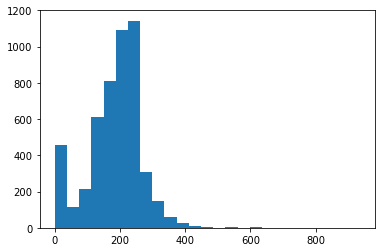

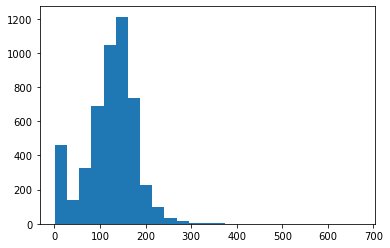

Mean word count of abs is 123.0118
Abstract in the present work\, we report the discovery and complete genome sequence of a novel partitivirus identified from brassica campestris l. ssp. chinensis\, which we have named "brassica campestris chinensis cryptic virus 1" (bccv1). next-generation sequencing (ngs) combined with adapter-ligation-mediated amplification allowed assembly of the full-length genome sequence of bccv1. the genome of bccv1 contains two dsrna segments\, dsrna1 (1595 bp) and dsrna2 (1591 bp)\, which encode a conserved rna-dependent rna polymerase (rdrp) and a putative capsid protein (cp)\, respectively. homology searches and phylogenetic analysis of the 479-aa rdrp and 438-aa cp showed that bccv1 is a new member of the genus deltapartitivirus\, family partitiviridae. this is the first report of the identification of a member of the family partitiviridae in brassica campestris l. ssp. chinensis. 
 
 is most similar to these 5 abstract: 

ID  108 :  a novel mycovirus with

<ipython-input-7-9d989a94dd65>:132: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print([abs_list[similar[0]] for similar in model.docvecs.most_similar(42)])


In [7]:
from gensim.models import word2vec
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import WordNetLemmatizer, pos_tag, word_tokenize

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
stop_words = stopwords.words('english')


#####################################################################################
pat_data=pd.read_excel('V:/ML_projects/Merckgroup/Projects/Keyword_tagging/data/recent_5k.xlsx')
abs_text=pat_data['Abstract']
abs_list=pat_data['Abstract'].tolist()


#####################################################################################
#Tokenizing with simple preprocess gensim's simple preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True)) # returns lowercase tokens, ignoring tokens that are too short or too long


def remove_stopwords(sentence):
    filtered_words = [word for word in sentence if word not in stop_words]
    return filtered_words

        
abs_words = list(sent_to_words(abs_list))
lengths = [len(abst) for abst in abs_words]
plt.hist(lengths, bins = 25)
plt.show()


filtered_abst = [remove_stopwords(abst) for abst in abs_words]
lengths = [len(abst) for abst in filtered_abst]
plt.hist(lengths, bins = 25)
plt.show()

print('Mean word count of abs is %s' % np.mean(lengths))


#################################################################################
n = 50
ft_model = FastText(filtered_abst, vector_size=n, window=8, min_count=5, workers=2,sg=1)

#####################################################################################


#To proprely work with scikit's vectorizer
merged_questions = [' '.join(question) for question in filtered_abst]
document_names = ['Doc {:d}'.format(i) for i in range(len(merged_questions))]

def get_tfidf(docs, ngram_range=(1,1), index=None):
    vect = TfidfVectorizer(stop_words='english', ngram_range=ngram_range)
    tfidf = vect.fit_transform(docs).todense()
    return pd.DataFrame(tfidf, columns=vect.get_feature_names(), index=index).T

tfidf = get_tfidf(merged_questions, ngram_range=(1,1), index=document_names)

def get_sent_embs(emb_model):
    sent_embs = []
    for desc in range(len(filtered_abst)):
        sent_emb = np.zeros((1, n))
        if len(filtered_abst[desc]) > 0:
            sent_emb = np.zeros((1, n))
            div = 0
            model = emb_model
            for word in filtered_abst[desc]:
                if word in model.wv.key_to_index and  word in tfidf.index:
                    word_emb = model.wv[word]
                    weight = tfidf.loc[word, 'Doc {:d}'.format(desc)]
                    
                    sent_emb = np.add(sent_emb, word_emb * weight)
                    div += weight
                else:
                    div += 1e-13 #to avoid dividing by 0
        if div == 0:
            print(desc)

        sent_emb = np.divide(sent_emb, div)
        sent_embs.append(sent_emb.flatten())
    return sent_embs

ft_sent = get_sent_embs(emb_model = ft_model) 



######################################################################
def get_n_most_similar(interest_index, embeddings, n):
    """
    Takes the embedding vector of interest, the list with all embeddings, and the number of similar abstract to 
    retrieve.
    Outputs the disctionary IDs and distances
    """
    nbrs = NearestNeighbors(n_neighbors=n, metric='cosine').fit(embeddings)
    distances, indices = nbrs.kneighbors(embeddings)
    similar_indices = indices[interest_index][1:]
    similar_distances = distances[interest_index][1:]
    return similar_indices, similar_distances

def print_similar(interest_index, embeddings, n):
    """
    Convenience function for visual analysis
    """
    closest_ind, closest_dist = get_n_most_similar(interest_index, embeddings, n)
    print('Abstract %s \n \n is most similar to these %s abstract: \n' % (abs_list[interest_index], n))
    for question in closest_ind:
        print('ID ', question, ': ',abs_list[question])
        
print_similar(42, ft_sent, 5)  

#################################################################################

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(filtered_abst)]
model = Doc2Vec(documents, vector_size=n, window=8, min_count=5, workers=2, dm = 1, epochs=20)
print(abs_list[42], ' \nis similar to \n')
print([abs_list[similar[0]] for similar in model.docvecs.most_similar(42)])





In [1]:
text="D001151\tChemical\tArsenic\tMechanisms Underlying Latent Disease Risk Associated with Early-Life <target> Arsenic </target> Exposure : Current Research Trends and Scientific Gaps ."

In [2]:
text.split('/t')

['D001151\tChemical\tArsenic\tMechanisms Underlying Latent Disease Risk Associated with Early-Life <target> Arsenic <',
 'arget> Exposure : Current Research Trends and Scientific Gaps .']

In [4]:
import pandas as pd


In [ ]:
pd.read_csv('path_of_file.txt',delimiter='/t')